## Load Libraries

In [361]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.ensemble import VotingClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

# libraries for ANN
from tensorflow import keras
import tensorflow as tf
from scikeras.wrappers import KerasClassifier, KerasRegressor

## Load Data

We need to load from `traindata.csv` and `trainlabel.txt` seperately and combine them together

In [318]:
train_data_set = pd.read_csv("traindata.csv")
#Check for Null Data
print(train_data_set.isnull().sum())
train_labels = pd.read_csv("trainlabel.txt",header=None,names=['income'])
if len(train_labels) != len(train_data_set):
    raise ValueError("traindata.csv and trainlabel.txt have different number of rows.")
train_data_set['income'] = train_labels
# train_data_set.fillna(np.nan)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64


## Anaylze the Data
### Overview

In [226]:
# # Identify Numeric features
# numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']
# # Identify Categorical features
# cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']
profile = ProfileReport(train_data_set, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Check shape of the dataset

In [227]:
train_data_set.shape

(22792, 15)

### Preview Dataset

In [228]:
train_data_set.head()

age         workclass  fnlwgt     education  education.num  \
0   77         Local-gov  177550     Bachelors             13   
1   40      Self-emp-inc  475322     Bachelors             13   
2   29  Self-emp-not-inc  341672       HS-grad              9   
3   41           Private  184378       HS-grad              9   
4   22           Private  306967  Some-college             10   

          marital.status        occupation    relationship  \
0     Married-civ-spouse      Adm-clerical         Husband   
1              Separated      Craft-repair       Own-child   
2  Married-spouse-absent  Transport-moving  Other-relative   
3              Separated      Craft-repair   Not-in-family   
4          Never-married      Adm-clerical   Not-in-family   

                 race     sex  capital.gain  capital.loss  hours.per.week  \
0               White    Male          3818             0              14   
1               White    Male             0             0              50   
2  Asian-Pac-Islander    Male             0          1564              50   
3               White    Male             0             0              40   
4               White  Female             0             0              25   

  native.country  income  
0  United-States       0  
1  United-States       0  
2          India       1  
3  United-States       0  
4  United-States       0

### View summary of dataframe

In [229]:
train_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       22792 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education.num   22792 non-null  int64 
 5   marital.status  22792 non-null  object
 6   occupation      22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital.gain    22792 non-null  int64 
 11  capital.loss    22792 non-null  int64 
 12  hours.per.week  22792 non-null  int64 
 13  native.country  22792 non-null  object
 14  income          22792 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.6+ MB


Summary of the dataset shows that there are no missing values. But the preview shows that the dataset contains values coded as `?`. So, I will encode `?` as `NaN` values.

### Encode `?` as `NaN`s and Again check the summary of dataframe

In [319]:
train_data_set[train_data_set == '?'] = np.nan
train_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       21514 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education.num   22792 non-null  int64 
 5   marital.status  22792 non-null  object
 6   occupation      21509 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital.gain    22792 non-null  int64 
 11  capital.loss    22792 non-null  int64 
 12  hours.per.week  22792 non-null  int64 
 13  native.country  22369 non-null  object
 14  income          22792 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.6+ MB


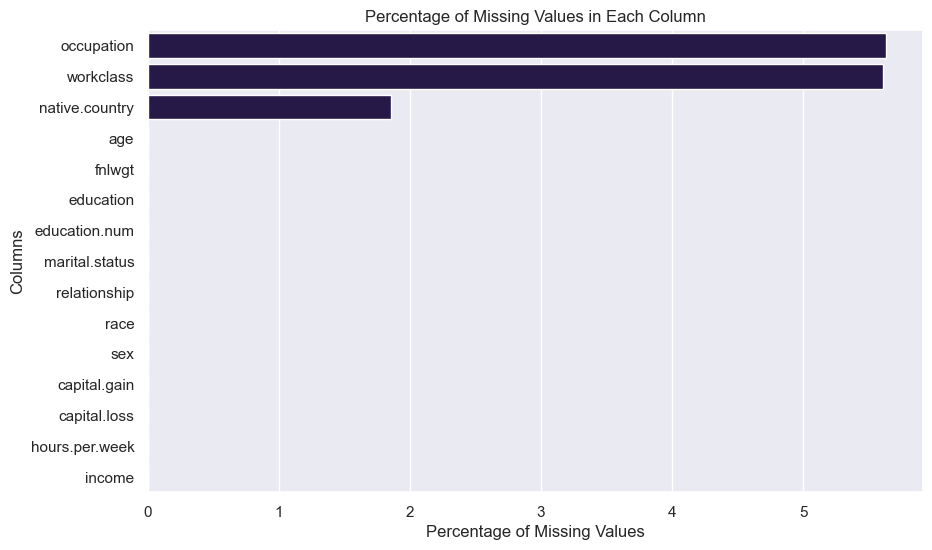

In [231]:
missing_value_percentage = train_data_set.isnull().mean()*100
missing_value_percentage_sorted = missing_value_percentage.sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x=missing_value_percentage_sorted,y=missing_value_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

Now, the summary shows that the variables - workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value.

### Impute missing values with mode[0]

In [320]:
for col in ['workclass', 'occupation', 'native.country']:
    train_data_set[col].fillna(train_data_set[col].mode()[0], inplace=True)

In [321]:
train_data_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

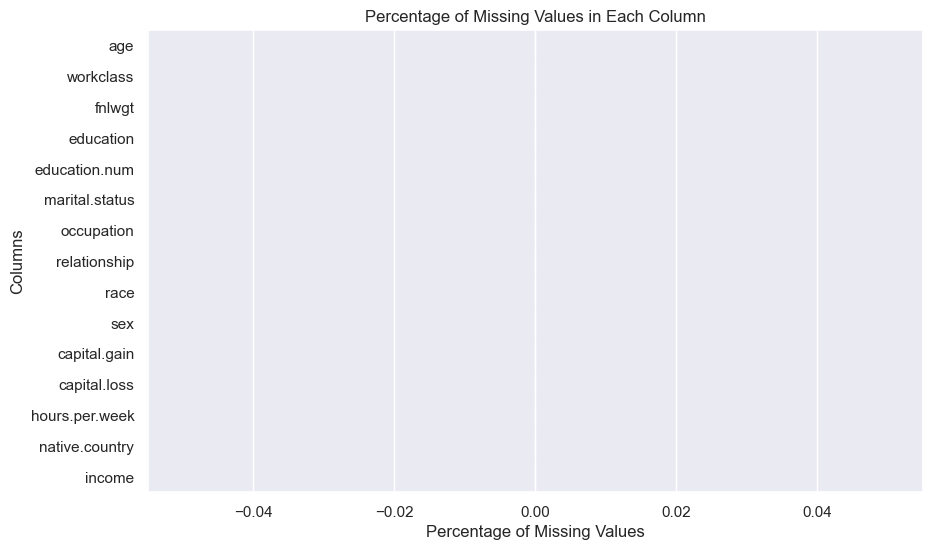

In [234]:
missing_value_percentage = train_data_set.isnull().mean()*100
missing_value_percentage_sorted = missing_value_percentage.sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x=missing_value_percentage_sorted,y=missing_value_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

Now we can see that there are no missing values in the dataset.



### Check the duplicates

In [235]:
train_data_set[train_data_set.duplicated(keep=False)]

age workclass  fnlwgt     education  education.num      marital.status  \
55      25   Private  195994       1st-4th              2       Never-married   
704     23   Private  240137       5th-6th              3       Never-married   
1961    46   Private  173243       HS-grad              9  Married-civ-spouse   
4108    44   Private  367749     Bachelors             13       Never-married   
5721    44   Private  367749     Bachelors             13       Never-married   
8088    25   Private  308144     Bachelors             13       Never-married   
8254    21   Private  243368     Preschool              1       Never-married   
9196    42   Private  204235  Some-college             10  Married-civ-spouse   
9830    20   Private  107658  Some-college             10       Never-married   
9853    25   Private  195994       1st-4th              2       Never-married   
11332   39   Private   30916       HS-grad              9  Married-civ-spouse   
13676   27   Private  255582       HS-grad              9       Never-married   
15108   20   Private  107658  Some-college             10       Never-married   
16958   42   Private  204235  Some-college             10  Married-civ-spouse   
18372   25   Private  308144     Bachelors             13       Never-married   
18382   23   Private  240137       5th-6th              3       Never-married   
19488   46   Private  173243       HS-grad              9  Married-civ-spouse   
19733   39   Private   30916       HS-grad              9  Married-civ-spouse   
20026   27   Private  255582       HS-grad              9       Never-married   
20405   21   Private  243368     Preschool              1       Never-married   

              occupation   relationship   race     sex  capital.gain  \
55       Priv-house-serv  Not-in-family  White  Female             0   
704    Handlers-cleaners  Not-in-family  White    Male             0   
1961        Craft-repair        Husband  White    Male             0   
4108      Prof-specialty  Not-in-family  White  Female             0   
5721      Prof-specialty  Not-in-family  White  Female             0   
8088        Craft-repair  Not-in-family  White    Male             0   
8254     Farming-fishing  Not-in-family  White    Male             0   
9196      Prof-specialty        Husband  White    Male             0   
9830        Tech-support  Not-in-family  White  Female             0   
9853     Priv-house-serv  Not-in-family  White  Female             0   
11332       Craft-repair        Husband  White    Male             0   
13676  Machine-op-inspct  Not-in-family  White  Female             0   
15108       Tech-support  Not-in-family  White  Female             0   
16958     Prof-specialty        Husband  White    Male             0   
18372       Craft-repair  Not-in-family  White    Male             0   
18382  Handlers-cleaners  Not-in-family  White    Male             0   
19488       Craft-repair        Husband  White    Male             0   
19733       Craft-repair        Husband  White    Male             0   
20026  Machine-op-inspct  Not-in-family  White  Female             0   
20405    Farming-fishing  Not-in-family  White    Male             0   

       capital.loss  hours.per.week native.country  income  
55                0              40      Guatemala       0  
704               0              55         Mexico       0  
1961              0              40  United-States       0  
4108              0              45         Mexico       0  
5721              0              45         Mexico       0  
8088              0              40         Mexico       0  
8254              0              50         Mexico       0  
9196              0              40  United-States       1  
9830              0              10  United-States       0  
9853              0              40      Guatemala       0  
11332             0              40  United-States       0  
13676             0              40  United-States       0  

In [322]:
train_data_set.duplicated().sum()

10

In [323]:
#Drop the duplicates from the DataFrame
train_data_set.drop_duplicates(inplace=True)

In [238]:
train_data_set.shape

(22782, 15)

In [239]:
# Inspect useless features
train_data_set.nunique().sort_values

<bound method Series.sort_values of age                  71
workclass             8
fnlwgt            16645
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        117
capital.loss         86
hours.per.week       92
native.country       40
income                2
dtype: int64>

In [240]:
train_data_set = train_data_set.drop(columns=['fnlwgt'])
# Remove this as it often does not contribute significantly to data analysis
train_data_set.head()

age         workclass     education  education.num         marital.status  \
0   77         Local-gov     Bachelors             13     Married-civ-spouse   
1   40      Self-emp-inc     Bachelors             13              Separated   
2   29  Self-emp-not-inc       HS-grad              9  Married-spouse-absent   
3   41           Private       HS-grad              9              Separated   
4   22           Private  Some-college             10          Never-married   

         occupation    relationship                race     sex  capital.gain  \
0      Adm-clerical         Husband               White    Male          3818   
1      Craft-repair       Own-child               White    Male             0   
2  Transport-moving  Other-relative  Asian-Pac-Islander    Male             0   
3      Craft-repair   Not-in-family               White    Male             0   
4      Adm-clerical   Not-in-family               White  Female             0   

   capital.loss  hours.per.week native.country  income  
0             0              14  United-States       0  
1             0              50  United-States       0  
2          1564              50          India       1  
3             0              40  United-States       0  
4             0              25  United-States       0

### Draw the boxplot for numeric and non-numeric features respectively

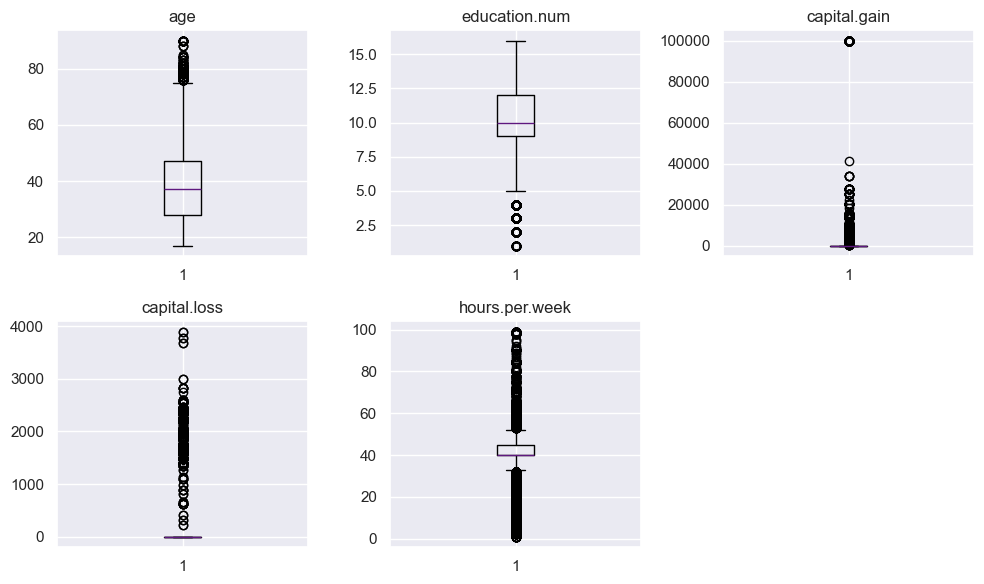

In [241]:
numeric_columns = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(train_data_set[column])
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

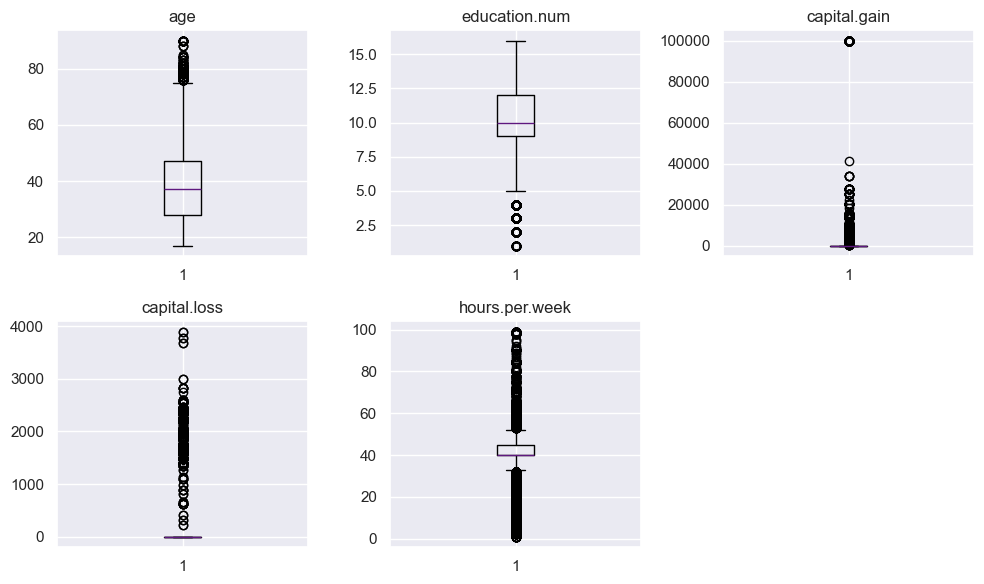

In [242]:
condition = (train_data_set['capital.gain'] > 40000) | (train_data_set['capital.loss'] > 3500)
df = train_data_set[~condition]

numeric_columns = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(train_data_set[column])
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Visualization

Text(0.5, 1.0, 'Correlation Matrix')

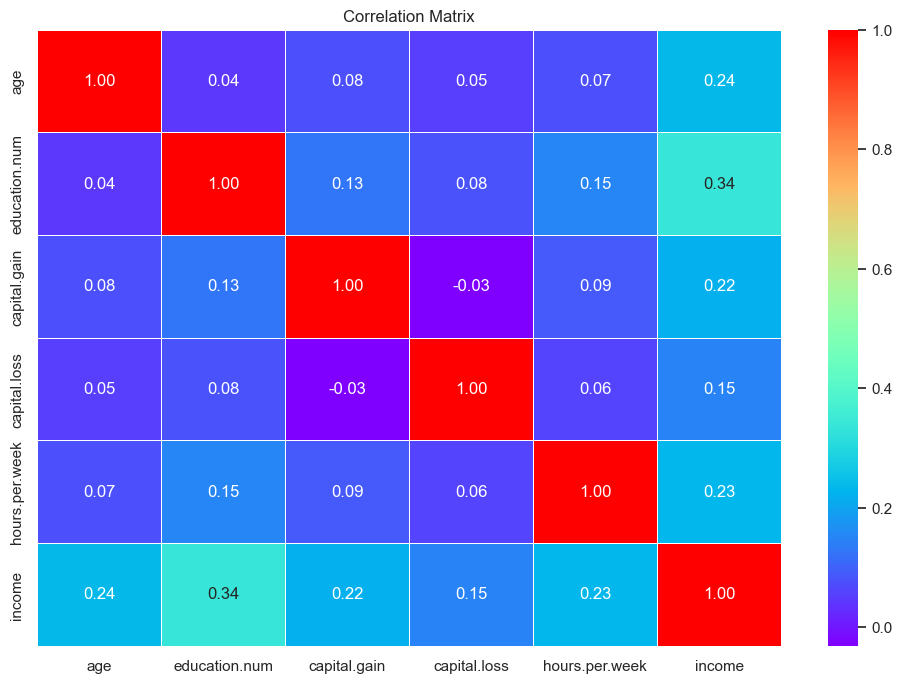

In [243]:
numeric_columns = train_data_set.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

### Draw curve graph between age and income

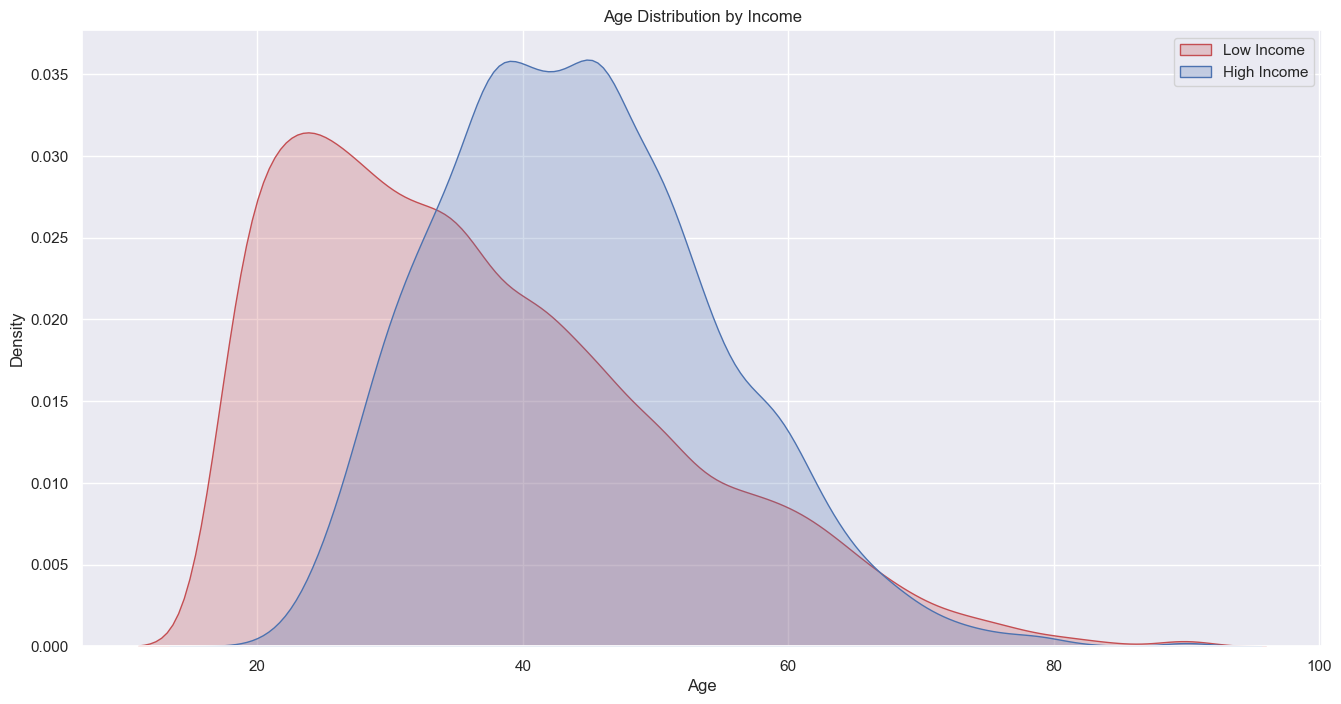

In [244]:
plt.figure(figsize=(16, 8))

sns.set_theme(style="darkgrid")
sns.set_palette("magma")

sns.kdeplot(data=train_data_set[train_data_set['income'] == 0]['age'], shade=True, color="r", label="Low Income")
sns.kdeplot(data=train_data_set[train_data_set['income'] == 1]['age'], shade=True, color="b", label="High Income")

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Income')

plt.legend()

plt.show()

<Axes: xlabel='age', ylabel='Density'>

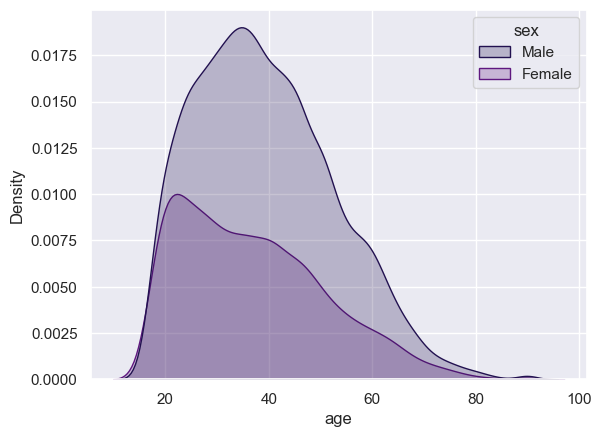

In [245]:
sns.kdeplot(x='age', hue ='sex', data=train_data_set, fill = True)

In [246]:
df.groupby('workclass').size()

workclass
Federal-gov           676
Local-gov            1484
Never-worked            5
Private             17088
Self-emp-inc          765
Self-emp-not-inc     1716
State-gov             927
Without-pay             8
dtype: int64

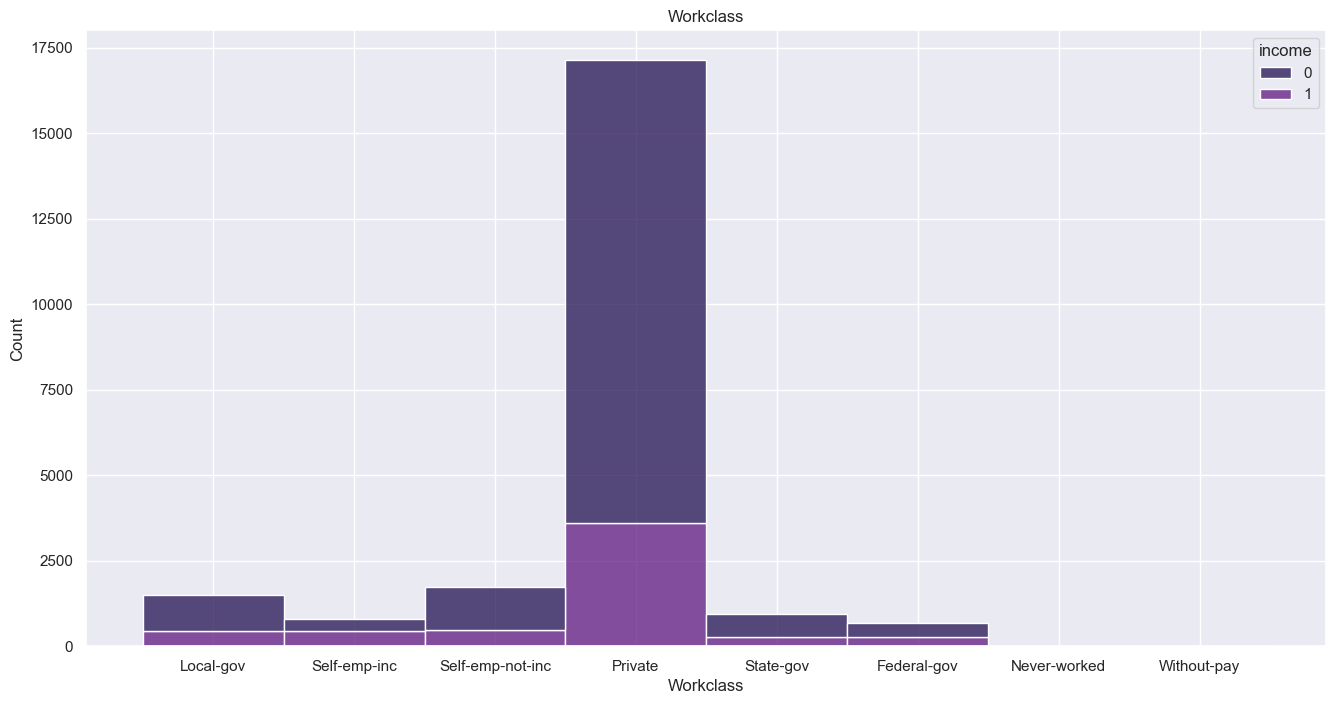

In [247]:
# workclass
plt.figure(figsize=(16, 8))

sns.histplot(data=train_data_set, x='workclass', hue='income', multiple='stack')

plt.xlabel('Workclass')
plt.title('Workclass')

plt.show()

In [248]:
df.groupby('education').size()

education
10th             639
11th             840
12th             292
1st-4th          120
5th-6th          238
7th-8th          450
9th              374
Assoc-acdm       751
Assoc-voc        969
Bachelors       3714
Doctorate        289
HS-grad         7348
Masters         1176
Preschool         38
Prof-school      382
Some-college    5049
dtype: int64

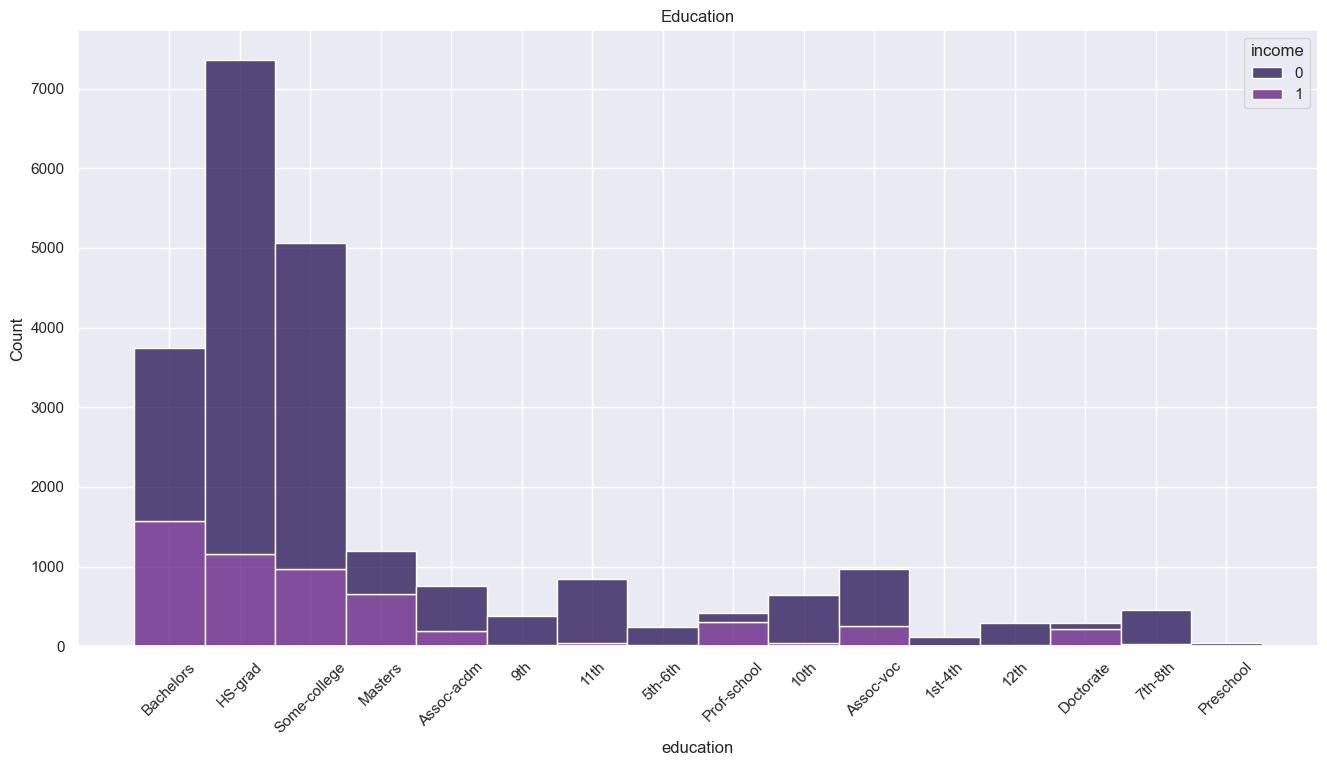

In [249]:
plt.figure(figsize=(16, 8))

sns.histplot(data=train_data_set, x='education', hue='income', multiple='stack')

plt.xlabel('education')
plt.title('Education')

plt.xticks(rotation=45)

plt.show()

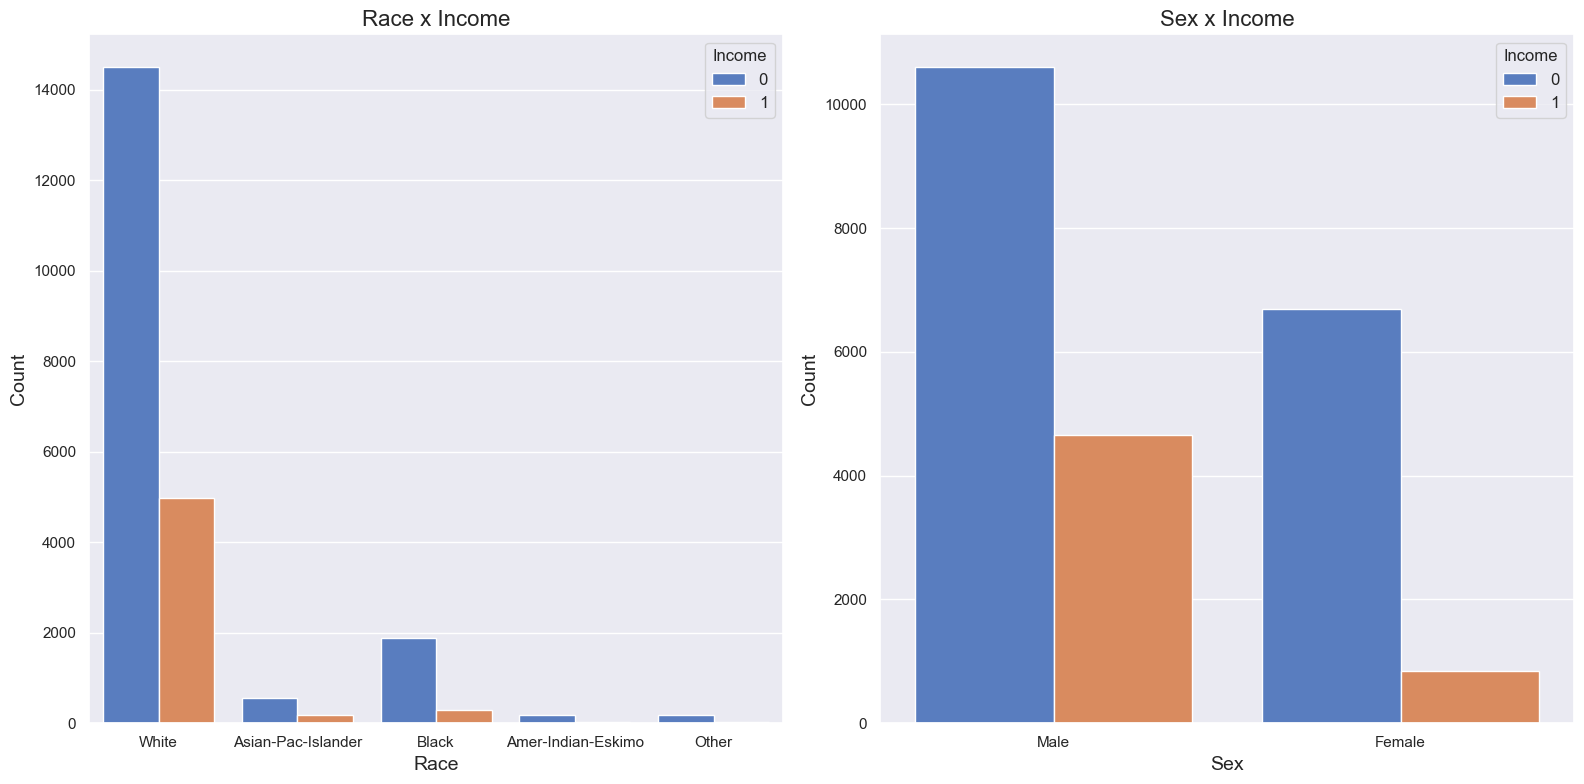

In [250]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(data=train_data_set, x='race', hue='income', palette='muted', ax=axes[0])
axes[0].set_title('Race x Income', fontsize=16)
axes[0].set_xlabel('Race', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Income', fontsize=12)

sns.countplot(data=train_data_set, x='sex', hue='income', palette='muted', ax=axes[1])
axes[1].set_title('Sex x Income', fontsize=16)
axes[1].set_xlabel('Sex', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Income', fontsize=12)

plt.tight_layout()

plt.show()

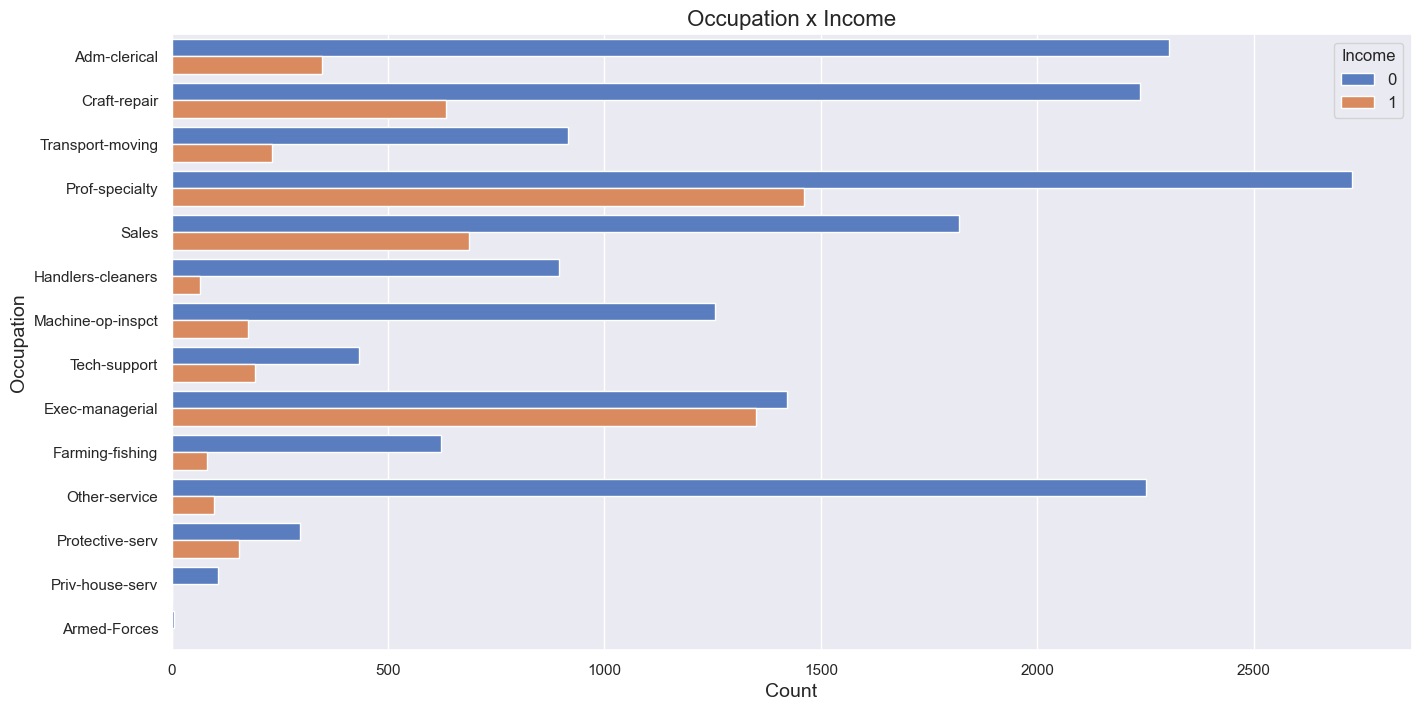

In [251]:
plt.figure(figsize=(16, 8))

sns.countplot(data=train_data_set, y='occupation', hue='income', palette='muted')

plt.title('Occupation x Income', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Occupation', fontsize=14)

plt.legend(title='Income', fontsize=12)

plt.show()

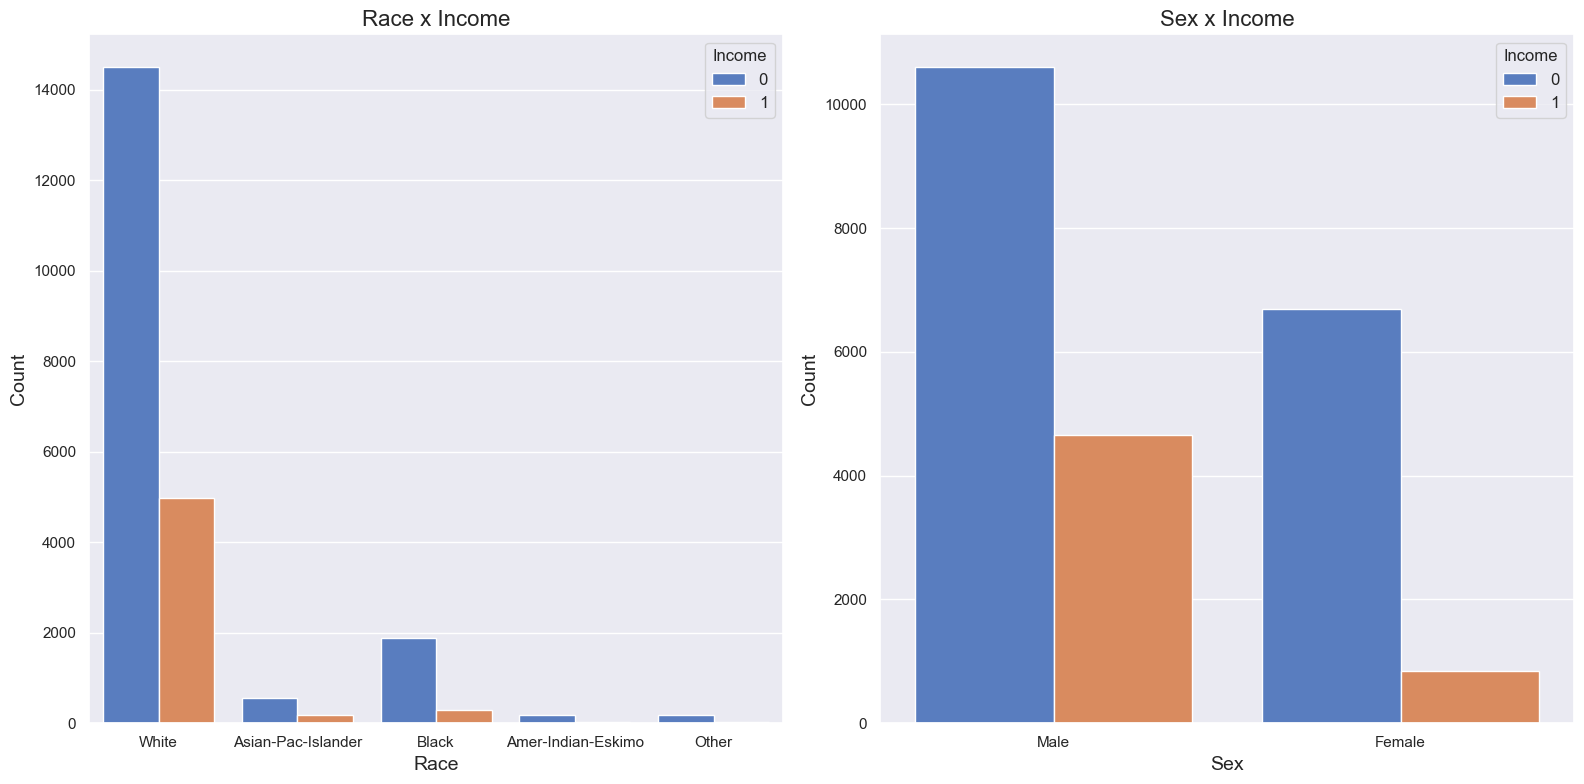

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(data=train_data_set, x='race', hue='income', palette='muted', ax=axes[0])
axes[0].set_title('Race x Income', fontsize=16)
axes[0].set_xlabel('Race', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Income', fontsize=12)

sns.countplot(data=train_data_set, x='sex', hue='income', palette='muted', ax=axes[1])
axes[1].set_title('Sex x Income', fontsize=16)
axes[1].set_xlabel('Sex', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Income', fontsize=12)

plt.tight_layout()

plt.show()

### Split the data and get the dummies
First we will split the data into dependent and independent variables, and then we will split the dependent variables into continous variables and categorical variables.

In [324]:
# Split into dependend and independent variables
X = train_data_set.drop('income', axis=1)
y = train_data_set['income']

In [325]:
# Split X into continous variables and categorical variables

X_continous  = X[['age', 'capital.gain', 'capital.loss', 'hours.per.week','education.num']]

X_categorical = X[['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race',
                   'sex', 'native.country']]

In [326]:
# Get the dummies
X_encoded = pd.get_dummies(X_categorical)
# Concatenate both continous and encoded sets:
X = pd.concat([X_continous, X_encoded],axis=1)
X

age  capital.gain  capital.loss  hours.per.week  education.num  \
0       77          3818             0              14             13   
1       40             0             0              50             13   
2       29             0          1564              50              9   
3       41             0             0              40              9   
4       22             0             0              25             10   
...    ...           ...           ...             ...            ...   
22787   48             0             0              50              7   
22788   26             0             0              40              9   
22789   36             0             0              40              9   
22790   33             0             0              40             10   
22791   17             0             0              30              8   

       workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                      False                 True                   False   
1                      False                False                   False   
2                      False                False                   False   
3                      False                False                   False   
4                      False                False                   False   
...                      ...                  ...                     ...   
22787                  False                False                   False   
22788                  False                False                   False   
22789                  False                False                   False   
22790                  False                False                   False   
22791                  False                False                   False   

       workclass_Private  workclass_Self-emp-inc  ...  \
0                  False                   False  ...   
1                  False                    True  ...   
2                  False                   False  ...   
3                   True                   False  ...   
4                   True                   False  ...   
...                  ...                     ...  ...   
22787               True                   False  ...   
22788              False                   False  ...   
22789               True                   False  ...   
22790               True                   False  ...   
22791               True                   False  ...   

       native.country_Portugal  native.country_Puerto-Rico  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
...                        ...                         ...   
22787                    False                       False   
22788                    False                       False   
22789                    False                       False   
22790                    False                       False   
22791                    False                       False   

       native.country_Scotland  native.country_South  native.country_Taiwan  \
0                        False                 False                  False   
1                        False                 False                  False   
2                        False                 False                  False   
3                        False                 False                  False   
4                        False                 False                  False   
...                        ...                   ...                    ...   
22787                    False                 False                  False   
22788                    False                 False                  False   
22789                    False                 False            

### Prepare the test data

In [327]:
test_data_set = pd.read_csv('testdata.csv')
T_continous  = test_data_set[['age', 'capital.gain', 'capital.loss', 'hours.per.week','education.num']]
T_categorical = test_data_set[['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race',
                   'sex', 'native.country']]
T_encoded = pd.get_dummies(T_categorical)
T = pd.concat([T_continous, T_encoded],axis=1)
column_difference = set(T.columns) - set(X.columns)
T.drop(columns=column_difference,inplace=True)
T


age  capital.gain  capital.loss  hours.per.week  education.num  \
0      71          2964             0              60             10   
1      34             0             0              55             15   
2      36             0             0              40              9   
3      32             0             0              45             13   
4      20             0             0              16             10   
...   ...           ...           ...             ...            ...   
9764   28             0             0              35             13   
9765   31             0             0              40              9   
9766   36             0             0              40             13   
9767   20             0             0              20              9   
9768   69             0             0              32             10   

      workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                     False                False                   False   
1                     False                False                   False   
2                     False                False                   False   
3                     False                False                   False   
4                     False                False                   False   
...                     ...                  ...                     ...   
9764                  False                False                   False   
9765                  False                False                   False   
9766                   True                False                   False   
9767                  False                False                   False   
9768                  False                False                   False   

      workclass_Private  workclass_Self-emp-inc  ...  native.country_Portugal  \
0                  True                   False  ...                    False   
1                  True                   False  ...                    False   
2                  True                   False  ...                    False   
3                  True                   False  ...                    False   
4                  True                   False  ...                    False   
...                 ...                     ...  ...                      ...   
9764               True                   False  ...                    False   
9765               True                   False  ...                    False   
9766              False                   False  ...                    False   
9767              False                   False  ...                    False   
9768              False                   False  ...                    False   

      native.country_Puerto-Rico  native.country_Scotland  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                          False                    False   
4                          False                    False   
...                          ...                      ...   
9764                       False                    False   
9765                       False                    False   
9766                       False                    False   
9767                       False                    False   
9768                       False                    False   

      native.country_South  native.country_Taiwan  native.country_Thailand  \
0                    False                  False                    False   
1                    False                  False                    False   
2                    False                  False                    False   
3                    False                  False                    False   
4                    False                  False                    False   
...                    ...                    ...     

## Modeling
In this section we will develop the predictive models. We will stratify the data and use a specific random state so all the models have the same target values. It is worth mentioning that in most of the models (the complex ones) I have done hyperparameter optimization with GridSearchCV. As this process takes a lot of time, I have commented the lines where I fit the GridSearch and I comment the results that I had when running it.

### Logistic Regression

In [376]:
#MODEL
logit = LogisticRegression(max_iter=10000)
logit = logit.fit(X,y)

#Cross Validation
cv = StratifiedKFold(n_splits=3)
val_logit = cross_val_score(logit,X,y,cv=cv).mean()
val_logit


0.8507593714335879

In [258]:
# PREDICTIONS
logit_predictions = logit.predict(T)
with open('LogicRegression.txt', 'w') as f:
    for prediction in logit_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to LogicRegression.txt")


Predictions saved to LogicRegression.txt


### Categorical Naive Bayes

In [374]:
# Prepare the test data, we only use categorical independent variables
column_difference = set(T_encoded.columns) - set(X_encoded.columns)
T_encoded.drop(columns=column_difference,inplace=True)

# Modeling
cnb = CategoricalNB()
cnb = cnb.fit(X_encoded,y)

#Cross Validation
cv = StratifiedKFold(n_splits=3)
val_cnb = cross_val_score(cnb,X_encoded,y,cv=cv).mean()
val_cnb


0.7501097357562988

In [260]:
# PREDICTOONS
cnb_predictions = cnb.predict(T_encoded)
with open('CNB.txt', 'w') as f:
    for prediction in cnb_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to CNB.txt")

Predictions saved to CNB.txt


### Gaussian Naive Bayes

In [380]:
# Prepare the data. We only use continous independent variables
column_difference = set(T_continous.columns) - set(X_continous.columns)
T_continous.drop(columns=column_difference,inplace=True)

#Modeling
gnb = GaussianNB()
gnb = gnb.fit(X_continous,y)

#Cross Validation
cv = StratifiedKFold(n_splits=3)
val_gnb = cross_val_score(gnb,X_continous,y,cv=cv).mean()
val_gnb


0.7949697129312615

In [262]:
# PREDICTIONS
gnb_predictions = gnb.predict(T_continous)
with open('GNB.txt', 'w') as f:
    for prediction in gnb_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to GNB.txt")

Predictions saved to GNB.txt


### K-Nearest Neighbors

In [263]:
# Prepare the data. We scale the data as this algorithm is distance-based
# scale data in a range of (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X)
X_train = scaler.transform(X)
X_test = scaler.transform(T)

In [264]:
# HYPERPARAMETERS OPTIMIZATION

# set the hyperparameters we want to test
param_grid = {'n_neighbors' : [45,46,47,48]}
cv = StratifiedKFold(n_splits=3)

optimal_params = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 2,
    cv = cv,
)
optimal_params.fit(X_train,y)
optimal_params.best_estimator_
# After a few tests, the best one is KNeighborsClassifier(n_neighbors=47)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .....................................n_neighbors=45; total time=   0.4s
[CV] END .....................................n_neighbors=45; total time=   0.5s
[CV] END .....................................n_neighbors=45; total time=   0.6s
[CV] END .....................................n_neighbors=46; total time=   0.5s
[CV] END .....................................n_neighbors=46; total time=   0.5s
[CV] END .....................................n_neighbors=46; total time=   0.5s
[CV] END .....................................n_neighbors=47; total time=   0.4s
[CV] END .....................................n_neighbors=47; total time=   0.4s
[CV] END .....................................n_neighbors=47; total time=   0.5s
[CV] END .....................................n_neighbors=48; total time=   0.5s
[CV] END .....................................n_neighbors=48; total time=   0.4s
[CV] END .....................................n_n

KNeighborsClassifier(n_neighbors=47)

In [265]:
# MODEL
knn = KNeighborsClassifier(n_neighbors=47)
knn = knn.fit(X_train,y)

# CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
val_knn = cross_val_score(knn, X_train, y, cv=cv).mean()
val_knn # validation score

0.8362303572996225

In [266]:
# PREDICTIONS
knn_predictions = knn.predict(X_test)

with open('KNN.txt', 'w') as f:
    for prediction in knn_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to KNN.txt")

Predictions saved to KNN.txt


### Support Vector Machines


In [269]:
# Scale the data(mean = 0 and sd = 1)
X_train = scale(X)
X_test = scale(T)

In [271]:
# HyperParameters Optimization
#1 Round -- Choose the Kernals
param_grid = {
    'kernel' : ['linear','poly','rbf','sigmoid']
}
cv = StratifiedKFold(n_splits=3)

optimal_params = GridSearchCV(
    estimator = svm.SVC(),
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 2,
    cv = cv
)
optimal_params.fit(X_train,y)
optimal_params.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ......................................kernel=linear; total time=  11.5s
[CV] END ......................................kernel=linear; total time=  11.0s
[CV] END ......................................kernel=linear; total time=  10.6s
[CV] END ........................................kernel=poly; total time=   6.4s
[CV] END ........................................kernel=poly; total time=   6.5s
[CV] END ........................................kernel=poly; total time=   6.7s
[CV] END .........................................kernel=rbf; total time=   9.7s
[CV] END .........................................kernel=rbf; total time=   9.3s
[CV] END .........................................kernel=rbf; total time=  14.2s
[CV] END .....................................kernel=sigmoid; total time=  10.7s
[CV] END .....................................kernel=sigmoid; total time=  10.9s
[CV] END .....................................ker

{'kernel': 'linear'}

In [272]:
# See how better linear kernel are with respect to other kernels
opt = optimal_params.cv_results_
opt = pd.DataFrame.from_dict(opt)
opt[['params', 'mean_test_score']]

params  mean_test_score
0   {'kernel': 'linear'}         0.849223
1     {'kernel': 'poly'}         0.826047
2      {'kernel': 'rbf'}         0.846589
3  {'kernel': 'sigmoid'}         0.831183

In [277]:
param_grid = {
    'kernel': ['rbf'],
    'C' : [1.6,1.8,2,2.2],
}
cv = StratifiedKFold(n_splits=3)
optimal_params = GridSearchCV(
    estimator = svm.SVC(),
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 2,
    cv = cv
)
optimal_params.fit(X_train,y)
print(
    "The best parameters are %s with a score of %f"
    % (optimal_params.best_params_, optimal_params.best_score_)
)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..................................C=1.6, kernel=rbf; total time=  12.7s
[CV] END ..................................C=1.6, kernel=rbf; total time=  17.4s
[CV] END ..................................C=1.6, kernel=rbf; total time=  14.1s
[CV] END ..................................C=1.8, kernel=rbf; total time=   9.9s
[CV] END ..................................C=1.8, kernel=rbf; total time=  10.5s
[CV] END ..................................C=1.8, kernel=rbf; total time=   9.6s
[CV] END ....................................C=2, kernel=rbf; total time=   9.3s
[CV] END ....................................C=2, kernel=rbf; total time=   9.6s
[CV] END ....................................C=2, kernel=rbf; total time=  10.2s
[CV] END ..................................C=2.2, kernel=rbf; total time=   9.9s
[CV] END ..................................C=2.2, kernel=rbf; total time=   9.5s
[CV] END ..................................C=2.2,

In [278]:
# MODEL
suppvm = svm.SVC(kernel='linear')
suppvm = suppvm.fit(X_train,y)
# CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
val_suppvm = cross_val_score(suppvm, X_train, y, cv=cv).mean()
val_suppvm # validation score

0.8492230708454042

In [279]:
# PREDICTIONS
suppvm_predictions = suppvm.predict(X_test)
with open('SVM.txt', 'w') as f:
    for prediction in suppvm_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to SVM.txt")


Predictions saved to SVM.txt


### Decision Trees

In [282]:
# HYPERPARAMETERS OPTIMIZATION
param_grid = {
'max_depth' : [2,4,6,7,8,9,10,11,12,16,20]
}

cv = StratifiedKFold(n_splits=3)

optimal_params = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 2,
    cv = cv
)
optimal_params.fit(X,y)
optimal_params.best_params_

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=6; total time=   0.0s
[CV] END ........................................max_depth=6; total time=   0.0s
[CV] END ........................................max_depth=6; total time=   0.0s
[CV] END ........................................max_depth=7; total time=   0.0s
[CV] END ........................................max_depth=7; total time=   0.0s
[CV] END .......................................

{'max_depth': 8}

In [296]:
# MODEL
tree = DecisionTreeClassifier(max_depth=8)
tree = tree.fit(X,y)

# CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
val_tree = cross_val_score(tree, X, y, cv=cv).mean()
val_tree # validation score

0.8546220700553068

In [297]:
tree_predicitons = tree.predict(T)
with open('DecisionTree.txt', 'w') as f:
    for prediction in tree_predicitons:
        f.write(f"{prediction}\n")

print("Predictions saved to DecisionTree.txt")

Predictions saved to DecisionTree.txt


### Random Forest


In [298]:
# HYPERPARAMETERS OPTIMIZATION
param_grid = {
'max_depth' : [8,10,12,16,18,20],
'n_estimators': [50,100,200],
'max_samples': [1,0.8,0.6]
}

cv = StratifiedKFold(n_splits=3)

optimal_params = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 2,
    cv = cv
)
optimal_params.fit(X,y)
optimal_params.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ........max_depth=8, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END ........max_depth=8, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END ........max_depth=8, max_samples=1, n_estimators=50; total time=   0.0s
[CV] END .......max_depth=8, max_samples=1, n_estimators=100; total time=   0.1s
[CV] END .......max_depth=8, max_samples=1, n_estimators=100; total time=   0.0s
[CV] END .......max_depth=8, max_samples=1, n_estimators=100; total time=   0.1s
[CV] END .......max_depth=8, max_samples=1, n_estimators=200; total time=   0.2s
[CV] END .......max_depth=8, max_samples=1, n_estimators=200; total time=   0.2s
[CV] END .......max_depth=8, max_samples=1, n_estimators=200; total time=   0.3s
[CV] END ......max_depth=8, max_samples=0.8, n_estimators=50; total time=   0.7s
[CV] END ......max_depth=8, max_samples=0.8, n_estimators=50; total time=   0.2s
[CV] END ......max_depth=8, max_samples=0.8, n_

{'max_depth': 18, 'max_samples': 0.6, 'n_estimators': 100}

In [299]:
# MODEL
Rforest = RandomForestClassifier(max_depth=18,max_samples=0.6, n_estimators=100)
Rforest = Rforest.fit(X, y)

# CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
val_Rforest = cross_val_score(Rforest, X, y, cv=cv).mean()
val_Rforest # validation score

0.8605916951979634

In [301]:
# PREDICTIONS
Rforest_predictions = Rforest.predict(T)
with open('RandomForest.txt', 'w') as f:
    for prediction in Rforest_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to RandomForest.txt")

Predictions saved to RandomForest.txt


### XGBoost(Extreme Gradient Boosting)

In [302]:
# HYPERPARAMETER OPTIMIZATION

# ROUND 1

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.3, 0.1, 0.05],
    'gamma': [0, 1, 10],
    'reg_lambda': [0, 1, 10]
}


cv = StratifiedKFold(n_splits=3)

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', #for binary classification
                                eval_metric="logloss",
                                use_label_encoder=False), #avoid warning (since we have done encoding)
    param_grid=param_grid,
    scoring='accuracy',
    verbose=2,
    cv = cv
)
optimal_params.fit(X,y)
optimal_params.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0; total time=   0.3s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0; total time=   0.3s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0; total time=   0.2s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1; total time=   0.3s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1; total time=   0.4s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1; total time=   0.6s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10; total time=   0.3s
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10; total time=   0.4s
[CV] END gamma=0, learning_rate=0.3, max_depth=5, reg_lambda=0; total time=   0.5s
[CV] END gamma=0, learning_rate=0.3, max_depth=5, reg_lambda=0; total time=   0.5s
[CV] END gamma=0, lear

{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'reg_lambda': 1}

In [304]:
# ROUND 2


param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.3, 0.5],
    'subsample': [1, 0.8, 0.6, 0.4],
    'gamma' : [10, 50, 100]
}



cv = StratifiedKFold(n_splits=3)

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', #for binary classification
                                eval_metric="logloss",
                                learning_rate= 0.1,
                                reg_lambda=1,
                                use_label_encoder=False), #avoid warning (since we have done encoding)
    param_grid=param_grid,
    scoring='accuracy',
    verbose=2,
    cv = cv
)
optimal_params.fit(X,y)
optimal_params.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=1; total time=   0.1s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=1; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=1; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.8; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.8; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.8; total time=   0.4s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.6; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.6; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.6; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.4; total time=   0.2s
[CV] END gamma=10, learning_rate=0.3, max_depth=4, subsample=0.4; total time=   0.2s
[CV] END 

{'gamma': 10, 'learning_rate': 0.3, 'max_depth': 6, 'subsample': 0.8}

In [311]:
# MODEL
xgbm = xgb.XGBClassifier(eval_metric="logloss",
                        learning_rate= 0.3,
                        reg_lambda=10,
                        use_label_encoder=False, # as we have done encoding
                        max_depth=8,
                        subsample=1)

xgbm = xgbm.fit(X, y)

# CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
val_xgbm = cross_val_score(xgbm, X, y, cv=cv).mean()
val_xgbm

0.8704240189623387

In [312]:
# Predictions
xgbm_predictions = xgbm.predict(T)
with open('XGBoost.txt', 'w') as f:
    for prediction in xgbm_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to XGBoost.txt")

Predictions saved to XGBoost.txt


In [379]:
xgbm_predicitons_prob = xgbm.predict_proba(T)
xgbm_predicitons_prob = xgbm_predicitons_prob[:,1]

### Artificial Neural Networks

In [328]:
# scale the data (mean=0, sd=1)
X_train = scale(X)
X_test = scale(T)

In [338]:
# HYPERPARAMETERS OPTIMIZATION

# ROUND 1

# first we need to define the model 
def ANN_1(neurons=10, hidden_layers=0, dropout_rate=0, learn_rate= 0.1):
    # model
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons, input_shape = (X_train.shape[1], ), activation='relu'))
    for i in range(hidden_layers):
        # Add one hidden layer
        model.add(keras.layers.Dense(neurons, activation='relu'))
        model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(1, activation='sigmoid')) #Output layers
    # Compile model
    optimizer = keras.optimizers.SGD(learning_rate=learn_rate, momentum = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# we will do the grid search with KerasClassifier
ann = KerasClassifier(build_fn=ANN_1, batch_size=30)


param_grid = {
    'model__neurons': [30, 60],
    'model__hidden_layers': [2],
    'model__dropout_rate': [0.0, 0.1],
    'model__learn_rate': [0.1, 0.03],
    'epochs': [8, 15]
}

cv = StratifiedKFold(n_splits=3)

optimal_params = GridSearchCV(estimator=ann, param_grid=param_grid, verbose=2, cv=cv)
optimal_params.fit(X_train,y)
optimal_params.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.7830 - loss: 0.4484
Epoch 2/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8494 - loss: 0.3317
Epoch 3/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.8560 - loss: 0.3122
Epoch 4/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.8564 - loss: 0.3123
Epoch 5/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8658 - loss: 0.2947
Epoch 6/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8635 - loss: 0.2917
Epoch 7/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8653 - loss: 0.2928
Epoch 8/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.8678 - loss: 0.2880
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
[CV] END epochs=8, model__dropout_rate=0.0, model__hidden_layers=2, model__learn_rate=0.1, model__neurons=30; total time=   4.7s
Epoch 1/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7968 - l

{'epochs': 8,
 'model__dropout_rate': 0.0,
 'model__hidden_layers': 2,
 'model__learn_rate': 0.1,
 'model__neurons': 30}

In [348]:
# ROUND 2

def ANN_2(init_mode='uniform', activation='relu'):
    # model
    model = keras.Sequential()
    model.add(keras.layers.Dense(30,kernel_initializer=init_mode,
                                 input_shape = (X_train.shape[1], ), activation=activation))
    model.add(keras.layers.Dense(30, kernel_initializer=init_mode,activation=activation))
    model.add(keras.layers.Dropout(0.0))
    model.add(keras.layers.Dense(1,kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


ann = KerasClassifier(build_fn=ANN_2, epochs= 8, batch_size=30)


param_grid = {
    'model__init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal',
                  'glorot_uniform', 'he_normal', 'he_uniform'],
    'model__activation': ['softmax','relu', 'tanh', 'sigmoid']
}
cv = StratifiedKFold(n_splits=3)


optimal_params = GridSearchCV(estimator=ann, param_grid=param_grid, verbose=2, cv=cv)
optimal_params.fit(X_train,y)
optimal_params.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Epoch 1/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7543 - loss: 0.5739
Epoch 2/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7555 - loss: 0.5563
Epoch 3/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.7579 - loss: 0.5536
Epoch 4/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7644 - loss: 0.5463
Epoch 5/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.7592 - loss: 0.5524
Epoch 6/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.7579 - loss: 0.5535
Epoch 7/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7566 - loss: 0.5552
Epoch 8/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7599 - loss: 0.5513
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
[CV] END model__activation=softmax, model__init_mode=uniform; total time=   4.7s
Epoch 1/8
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7615 - loss: 0.5727
Epoch 2/8
507/507 ━━━━━━━━━━━━━━━━

{'model__activation': 'relu', 'model__init_mode': 'normal'}

In [358]:
def ANN_():
    model = keras.Sequential()
    model.add(keras.layers.Dense(30,kernel_initializer='normal',
                                 input_shape = (X_train.shape[1], ), activation='relu'))
    model.add(keras.layers.Dense(30, kernel_initializer='normal',activation='relu'))
    model.add(keras.layers.Dropout(0.0))
    model.add(keras.layers.Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# we define a learning rate schedule in order to decrease the learning rate
# as we epoch increases.
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 8:
	    return 0.05
    else:
        return 0.01
    
# Early stopping: stop the learning when it has 3 consecutive epoch without improvement
callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Learning rate schedule
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
ann = KerasClassifier(build_fn=ANN_, epochs=8,  batch_size=30, verbose=0)
# CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
val_ann= cross_val_score(ann, X_train, y,
                         cv=cv, fit_params={'callbacks': [callback,callback2]}).mean()
val_ann # validation score

0.8532174523746817

In [371]:
# Cross Validation
n_members = 10
ann = KerasClassifier(build_fn=ANN_, epochs=8,  batch_size=30, verbose=0,callbacks=[callback,callback2])
models = [('ann' + str(i), ann) for i in range(n_members)]
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble = ensemble.fit(X_train,y)
scores = cross_val_score(ensemble, X_train, y, cv=3, scoring='accuracy')
print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross Validation Scores: [0.84843297 0.85225178 0.85528048]
Mean Accuracy: 0.8519884119041349


In [372]:
ann_ensemble_predictions = ensemble.predict(X_test)

In [373]:
# Save the predictions
with open('ANN.txt', 'w') as f:
    for prediction in ann_ensemble_predictions:
        f.write(f"{prediction}\n")

print("Predictions saved to ANN.txt")

Predictions saved to ANN.txt


### Ensembling


In [377]:
# Select the models by looking at the validation score
np.array([val_logit, val_cnb, val_knn, val_suppvm, val_tree, val_Rforest, val_xgbm, scores.mean()])

array([0.85075937, 0.75010974, 0.83623036, 0.84922307, 0.85462207,
       0.8605917 , 0.87042402, 0.85198841])

## Conclusion

In [381]:
results = {'Logistic Regression': val_logit, 
           'Categorical Naive Bayes': val_cnb,
           'Gaussian Naive Bayes': val_gnb,
           'K-Nearest Neighbors': val_knn ,
           'Support Vector Machines': val_suppvm,
           'Decision Trees':val_tree ,
           'Random Forest': val_Rforest,
           'XGBoost':val_xgbm ,
           'Artificial Neural Networks':scores.mean()     
          }
results_dataframe = pd.DataFrame.from_dict(results, orient='index', 
                                           columns=['Accuracy'])
results_dataframe

Accuracy
Logistic Regression         0.850759
Categorical Naive Bayes     0.750110
Gaussian Naive Bayes        0.794970
K-Nearest Neighbors         0.836230
Support Vector Machines     0.849223
Decision Trees              0.854622
Random Forest               0.860592
XGBoost                     0.870424
Artificial Neural Networks  0.851988